<a href="https://colab.research.google.com/github/supermansam/JInGEL-Project/blob/master/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing and visualising data & Using K-means
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd

In [0]:
#Data taken from Google Drive
from google.colab import drive


In [5]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
#Importing data and checking it
trainDf = pd.read_csv("/content/drive/My Drive/data JInGEL/training_without_labels.csv")
train   = pd.read_csv("/content/drive/My Drive/data JInGEL/training.csv")
data_label = train['label']
train.head()
#trainDf.head()

,power,energy,current,compair,compair_avg,label
0,10.500,211.277,0.093746,6.59078,6.53559,0
1,10.475,211.262,0.093854,6.59542,6.53799,0
2,10.475,211.262,0.092661,6.57393,6.54026,0
3,10.475,211.249,0.092985,6.52779,6.54273,0
4,10.475,211.224,0.092661,6.50264,6.54523,0


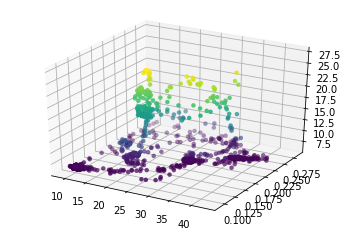

In [18]:
#Visualising in 3-D with comp air(not average)
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')

X = np.array(trainDf['power'])
Y = np.array(trainDf['current'])
Z = np.array(trainDf['compair'])

ax.scatter3D(X, Y, Z, c=Z, edgecolor = 'none')

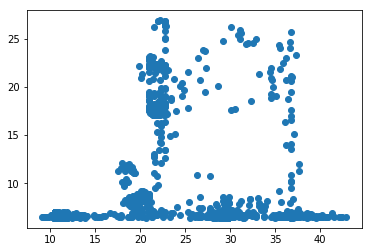

In [19]:
#2-D plot of Power and compair
plt.scatter(X, Z, marker ='o')

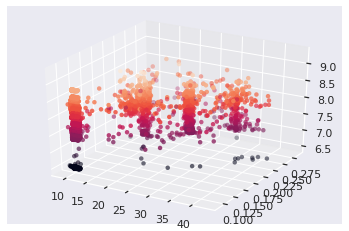

In [22]:
#Visualising in 3-D with comp air average
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')

X = np.array(trainDf['power'])
Y = np.array(trainDf['current'])
Z = np.array(trainDf['compair_avg'])

ax.scatter3D(X, Y, Z, c=Z, edgecolor = 'none')

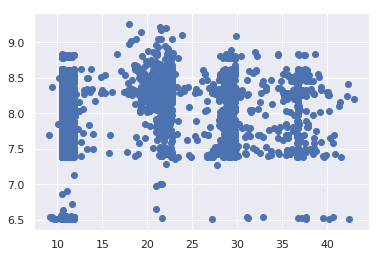

In [20]:
#2-D plot of Power and compair_avg
plt.scatter(X, Z, marker ='o')

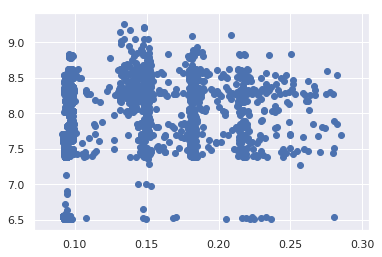

In [21]:
#2-D plot of Current and compair
plt.scatter(Y, Z, marker ='o')

In [25]:
#K-means for all 5-features
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(trainDf[['power','energy','current','compair','compair_avg']])
y_kmeans = kmeans.predict(trainDf[['power','energy','current','compair','compair_avg']])
kmeans.cluster_centers_.shape

(4, 5)

In [0]:
#accuracy
from sklearn.metrics import accuracy_score
#accuracy_score(data_label, y_kmeans)
dataframe=pd.DataFrame(y_kmeans, columns=['a'])
dataframe.to_csv("/content/drive/My Drive/data JInGEL/matlab_kmeans.csv")

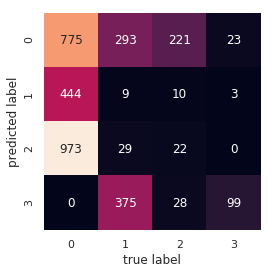

In [27]:
#confusion_matrix
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(data_label, y_kmeans)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [58]:
#K-means for 3-features
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(trainDf[['power','current','compair_avg']])
y_kmeans = kmeans.predict(trainDf[['power','current','compair_avg']])
kmeans.cluster_centers_.shape

(4, 3)

In [59]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(data_label, y_kmeans)

0.8780266343825666

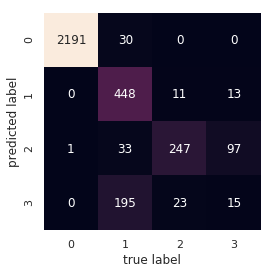

In [60]:
#confusion_matrix
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(data_label, y_kmeans)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [15]:
#accuracy with matlab
from sklearn.metrics import accuracy_score
kmeans_matlab = pd.read_csv("/content/drive/My Drive/data JInGEL/matlab_kmeans.csv")
km = kmeans_matlab['k-means']
accuracy_score(data_label, km)

0.714588377723971